In [2]:
import numpy as np
from numpy.linalg import matrix_power
from scipy.linalg import hadamard
import matplotlib.pyplot as plt

In [3]:
ket0 = np.array([1,0,0,0,0])
ket1 = np.array([0,1,0,0,0])
ket2 = np.array([0,0,1,0,0])
ket3 = np.array([0,0,0,1,0])
ket4 = np.array([0,0,0,0,1])

out00 = np.outer(ket0,ket0)
out01 = np.outer(ket0,ket1)
out02 = np.outer(ket0,ket2)
out03 = np.outer(ket0,ket3)
out04 = np.outer(ket0,ket4)
out10 = np.outer(ket1,ket0)
out11 = np.outer(ket1,ket1)
out12 = np.outer(ket1,ket2)
out13 = np.outer(ket1,ket3)
out14 = np.outer(ket1,ket4)
out20 = np.outer(ket2,ket0)
out21 = np.outer(ket2,ket1)
out22 = np.outer(ket2,ket2)
out23 = np.outer(ket2,ket3)
out24 = np.outer(ket2,ket4)
out30 = np.outer(ket3,ket0)
out31 = np.outer(ket3,ket1)
out32 = np.outer(ket3,ket2)
out33 = np.outer(ket3,ket3)
out34 = np.outer(ket3,ket4)
out40 = np.outer(ket4,ket0)
out41 = np.outer(ket4,ket1)
out42 = np.outer(ket4,ket2)
out43 = np.outer(ket4,ket3)
out44 = np.outer(ket4,ket4)

In [4]:
def shift(Hp):
    upshift1 = np.zeros(shape=(Hp,Hp)) #HpxHp matrix 
    for i in range(Hp):
        v1 = np.zeros(Hp) 
        v1[(i+1)%(Hp)] = 1 #|i + 1⟩ 
        v2 = np.zeros(Hp)
        v2[i] = 1 #⟨i|
        upshift1 += np.outer(v1,v2) #|i + 1⟩ ⟨i|

    up1 = np.kron(upshift1,out00) 

    upshift2 = np.zeros(shape=(Hp,Hp)) #HpxHp matrix 
    for i in range(Hp):
        v1 = np.zeros(Hp) 
        v1[(i+1)%(Hp)] = 1 #|i + 1⟩ 
        v2 = np.zeros(Hp)
        v2[i] = 1 #⟨i|
        upshift2 += np.outer(v1,v2) #|i + 1⟩ ⟨i|

    up2 = np.kron(upshift2,out11) 

    stayshift = np.eye(Hp)
    stay = np.kron(stayshift,out22) 

    downshift2 = np.zeros(shape=(Hp,Hp)) #HpxHp matrix 
    for i in range(Hp):
        v1 = np.zeros(Hp) 
        v1[(i-1)%(Hp)] = 1 #|i - 1⟩ 
        v2 = np.zeros(Hp)
        v2[i] = 1 #⟨i|
        downshift2 += np.outer(v1,v2) #|i - 1⟩ ⟨i|

    down2 = np.kron(downshift2,out33) 

    downshift1 = np.zeros(shape=(Hp,Hp)) #HpxHp matrix 
    for i in range(Hp):
        v1 = np.zeros(Hp) 
        v1[(i-1)%(Hp)] = 1 #|i - 1⟩ 
        v2 = np.zeros(Hp)
        v2[i] = 1 #⟨i|
        downshift1 += np.outer(v1,v2) #|i - 1⟩ ⟨i|

    down1 = np.kron(downshift1,out44) 

    return up1 + up2 + stay + down2 + down1

In [5]:
def walk(t, b):

    Hp = 2*t + 1 #Position Hilbert Space
    Hc = 5 #Coin Hilbert Space

    pos_0 = np.zeros(Hp)
    pos_0[t] = 1 #Central starting position

    state_i = np.kron(pos_0, b) #b = initial spin state

    Grover = (-3*out00 + 2*out01 + 2*out02 + 2*out03 + 2*out04 + 2*out10 -3*out11 + 2*out12 + 2*out13 + 2*out14 + 2*out20 + 2*out21 -3*out22 + 2*out23 + 2*out24 + 2*out30 + 2*out31 + 2*out32 -3*out33 + 2*out34 + 2*out40 + 2*out41 +2*out42 + 2*out43 -3*out44) / 5
    C = np.kron(np.eye(Hp),Grover) #Coin = Hadamard

    U = np.dot(shift(Hp),C)

    pos_f = matrix_power(U,t).dot(state_i)

    l = Hp-1//2
    ComPos = np.zeros(Hp)
    for i in range(Hp):
        ComPos[i] = abs(pos_f[Hc*i])**2 + abs(pos_f[Hc*i+1])**2 + abs(pos_f[Hc*i+2])**2 + abs(pos_f[Hc*i+3])**2 + abs(pos_f[Hc*i+4])**2 #probability of spin up + down in position i

    return ComPos

In [6]:
def norm(t, Hp, compos):
    norm = 0
    ComPos = compos 
    for i in range(Hp):
        norm += ComPos[i] 
    print(norm)
    return norm

In [7]:
def plot(t, b, sf, getnorm, getpos):

    Hp = 2*t + 1

    xpos2 = np.zeros(Hp)
    for i in range(0,Hp):
        xpos2[i] = i-t 

    compos = walk(t, b)

    plotnorm = norm(t, Hp, compos)

    plt.plot(xpos2, (compos), '-b.', linewidth=0.25, markersize=1)
    plt.xlabel("Position")
    plt.ylabel("Probability")
    plt.xlim([-t, t])
    plt.ylim(bottom = 0)
    plt.figtext(.5, .9, r"$t = {}$".format(t), fontsize = 'x-small')
    plt.figtext(.65, .9, r"$norm = {}$".format(plotnorm), fontsize = 'x-small')
    plt.figtext(0.15, 0.9, "Ψ0 = {}".format(b), fontsize = 'x-small')

    if sf == True:
        plt.savefig("1D_Qutrit_Grover_Lazy_t{}_{}.pdf".format(t,b,)) #save image

    if getpos == True:
        positions(t, Hp, compos) #display all positions

In [8]:
def positions(t, Hp, compos):
    ComPos = compos
    for i in range(Hp):
        print("Pos", i-t, "=", ComPos[i]) #print all positions

1.0000000000000142


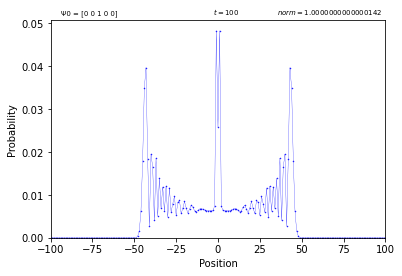

In [9]:
plot(100, ket2, sf = False, getnorm = True, getpos = False)

In [12]:
def localised(t,b,sf):
    pos_t_0 = np.zeros(t)

    for i in range(t):
        pos_t = walk(i,b)
        pos_t_0[i] = pos_t[i] 

    x = np.arange(0, t, 1, dtype=int)
    
    plt.plot(x,pos_t_0,'-b.', linewidth=0.25, markersize=1)
    plt.xlabel("T")
    plt.ylabel("Prob at Origin")

    if sf == True:
        plt.savefig("0prob_t{}_{}.pdf".format(t,b))

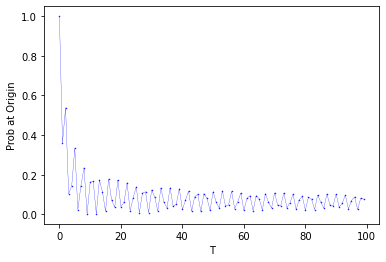

In [11]:
localised(100, ket2, False)